In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
from sklearn.preprocessing import LabelEncoder

In [45]:
import pandas as pd

df = pd.read_csv('장애인취업현황.csv', encoding='cp949')
df

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류
0,1,2020-01-01,65,시각장애,중증,경북 경산시,경영·행정·사무직
1,2,2020-01-01,61,시각장애,중증,경북 고령군,경영·행정·사무직
2,3,2020-01-01,53,시각장애,경증,경북 의성군,경영·행정·사무직
3,4,2020-01-01,64,시각장애,중증,경북 성주군,경영·행정·사무직
4,5,2020-01-01,53,시각장애,경증,경북 군위군,경영·행정·사무직
...,...,...,...,...,...,...,...
31641,31642,2020-10-01,63,시각장애,경증,경기 광주시,경영·행정·사무직
31642,31643,2020-12-14,59,지체장애,경증,충남 천안시 동남구,돌봄 서비스직(간병·육아)
31643,31644,2020-12-03,53,시각장애,경증,서울 구로구,영업·판매직
31644,31645,2020-12-01,61,신장장애,중증,부산 해운대구,정보통신 연구개발직 및 공학기술직


In [46]:
df['근무지역_구별'] = df.근무지역.str.extract('서울\s([가-힣]+)')
df

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류,근무지역_구별
0,1,2020-01-01,65,시각장애,중증,경북 경산시,경영·행정·사무직,NaN
1,2,2020-01-01,61,시각장애,중증,경북 고령군,경영·행정·사무직,NaN
2,3,2020-01-01,53,시각장애,경증,경북 의성군,경영·행정·사무직,NaN
3,4,2020-01-01,64,시각장애,중증,경북 성주군,경영·행정·사무직,NaN
4,5,2020-01-01,53,시각장애,경증,경북 군위군,경영·행정·사무직,NaN
...,...,...,...,...,...,...,...,...
31641,31642,2020-10-01,63,시각장애,경증,경기 광주시,경영·행정·사무직,NaN
31642,31643,2020-12-14,59,지체장애,경증,충남 천안시 동남구,돌봄 서비스직(간병·육아),NaN
31643,31644,2020-12-03,53,시각장애,경증,서울 구로구,영업·판매직,구로구
31644,31645,2020-12-01,61,신장장애,중증,부산 해운대구,정보통신 연구개발직 및 공학기술직,NaN


In [47]:
handicapped_df = pd.read_csv('handicapped_df.csv')
handicapped_df

,Unnamed: 0,동별,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율
0,0,종로구,-0.5,0.83,8,0.52,0.21
1,1,중구,-0.3,0.61,17,0.52,0.25
2,2,용산구,-1.3,0.57,25,0.50,0.20
3,3,성동구,-0.6,0.61,32,0.51,0.21
4,4,광진구,-0.2,0.58,38,0.50,0.18
5,5,동대문구,-0.5,0.64,40,0.51,0.23
6,6,중랑구,0.5,0.72,46,0.53,0.28
7,7,성북구,-0.4,0.63,50,0.53,0.20
8,8,강북구,0.1,0.74,38,0.54,0.32
9,9,도봉구,0.4,0.68,40,0.53,0.22


In [48]:
df1 = df.dropna(axis=0)
df1

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류,근무지역_구별
171,172,2020-10-19,30,지체장애,중증,서울 송파구,경영·행정·사무직,송파구
172,173,2020-10-19,23,지적장애,중증,서울 송파구,경영·행정·사무직,송파구
173,174,2020-10-19,32,정신장애,중증,서울 송파구,경영·행정·사무직,송파구
179,180,2020-12-14,20,청각장애,중증,서울 강남구,스포츠·레크리에이션직,강남구
180,181,2020-12-14,36,지체장애,중증,서울 강남구,스포츠·레크리에이션직,강남구
...,...,...,...,...,...,...,...,...
31617,31618,2020-06-09,22,언어장애,경증,서울 종로구,인쇄·목재·공예 및 기타 설치·정비·생산직,종로구
31618,31619,2020-01-30,70,지체장애,경증,서울 광진구,인쇄·목재·공예 및 기타 설치·정비·생산직,광진구
31621,31622,2020-11-23,53,지체장애,경증,서울 구로구,사회복지·종교직,구로구
31643,31644,2020-12-03,53,시각장애,경증,서울 구로구,영업·판매직,구로구


In [49]:
df1.근무지역_구별.value_counts()

송파구     940
강남구     697
영등포구    669
중구      638
종로구     514
마포구     477
금천구     331
서초구     323
강서구     284
구로구     245
성동구     198
강동구     180
성북구     172
관악구     172
용산구     172
동작구     160
양천구     128
광진구     125
중랑구     125
노원구     107
은평구      94
도봉구      85
동대문구     81
서대문구     67
강북구      63
Name: 근무지역_구별, dtype: int64

In [68]:
df2 = df1.drop(['순번','취업일자','근무지역'], axis=1)
df2

,연령,장애유형,중증여부,취업직종대분류,근무지역_구별
171,30,지체장애,중증,경영·행정·사무직,송파구
172,23,지적장애,중증,경영·행정·사무직,송파구
173,32,정신장애,중증,경영·행정·사무직,송파구
179,20,청각장애,중증,스포츠·레크리에이션직,강남구
180,36,지체장애,중증,스포츠·레크리에이션직,강남구
...,...,...,...,...,...
31617,22,언어장애,경증,인쇄·목재·공예 및 기타 설치·정비·생산직,종로구
31618,70,지체장애,경증,인쇄·목재·공예 및 기타 설치·정비·생산직,광진구
31621,53,지체장애,경증,사회복지·종교직,구로구
31643,53,시각장애,경증,영업·판매직,구로구


In [69]:
groups = df2.groupby('근무지역_구별')
groups = groups.count()

In [71]:
df3 = groups.drop(['연령','장애유형','중증여부'], axis=1)
df3

,취업직종대분류
근무지역_구별,
강남구,697
강동구,180
강북구,63
강서구,284
관악구,172
광진구,125
구로구,245
금천구,331
노원구,107


In [72]:
df3.to_csv('장애인취업현황_구별.csv')

In [74]:
seoul = pd.read_excel('장애인_합계.xlsx')
seoul

,국가,도시,구별,지체_계,뇌병변_계,시각_계,청각_계,언어_계,지적장애_계,자폐성_계,정신장애_계,신장장애_계,심장장애_계,호흡기_계,간_계,안면_계,장루요루_계,뇌전증_계,합계
0,대한민국,서울특별시,종로구,2508,553,703,949,45,401,105,262,266,13,26,45,7,30,16,5929
1,대한민국,서울특별시,중구,2498,567,717,860,32,297,74,207,226,14,30,41,7,43,21,5634
2,대한민국,서울특별시,용산구,3253,757,933,1147,65,526,127,282,363,19,48,68,5,71,22,7686
3,대한민국,서울특별시,성동구,5061,1142,1135,1701,108,696,195,407,487,32,89,85,12,92,42,11284
4,대한민국,서울특별시,광진구,5415,1192,1312,1809,90,806,188,530,587,37,66,67,9,101,44,12253
5,대한민국,서울특별시,동대문구,7065,1583,1516,2429,140,899,171,633,692,31,82,103,18,112,44,15518
6,대한민국,서울특별시,중랑구,9465,2094,2094,2583,173,1323,254,856,972,50,144,98,14,162,75,20357
7,대한민국,서울특별시,성북구,7621,1788,1923,2600,167,1139,248,647,806,36,91,128,18,121,49,17382
8,대한민국,서울특별시,강북구,7538,1714,1909,2780,141,1218,175,747,759,37,99,85,6,134,53,17395
9,대한민국,서울특별시,도봉구,6558,1651,1604,2309,116,1114,192,668,714,35,66,93,16,125,39,15300


In [84]:
seoul1 = seoul.sort_values('구별')

In [85]:
seoul1['합계']

22    15182
24    18614
8     17395
15    28546
20    20211
4     12253
16    18374
17    11458
10    26904
9     15300
5     15518
19    14417
13    12945
12    12311
21    10291
3     11284
7     17382
23    20356
14    17525
18    14495
2      7686
11    21756
0      5929
1      5634
6     20357
Name: 합계, dtype: int64

In [88]:
df4 = df3.취업직종대분류/seoul1.합계
df4

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
강남구    NaN
강동구    NaN
강북구    NaN
강서구    NaN
관악구    NaN
광진구    NaN
구로구    NaN
금천구    NaN
노원구    NaN
도봉구    NaN
동대문구   NaN
동작구    NaN
마포구    NaN
서대문구   NaN
서초구    NaN
성동구    NaN
성북구    NaN
송파구    NaN
양천구    NaN
영등포구   NaN
용산구    NaN
은평구    NaN
종로구    NaN
중구     NaN
중랑구    NaN
dtype: float64

In [76]:
dff = pd.read_csv('장애인취업률포함.csv')
dff

,동별,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율,장애인취업률
0,강남구,-0.7,0.64,57,0.56,0.29,0.045910
1,강동구,1.4,0.63,60,0.54,0.20,0.009670
2,강북구,0.1,0.74,38,0.54,0.32,0.003622
3,강서구,0.2,0.76,66,0.55,0.37,0.009949
4,관악구,0.1,0.64,56,0.51,0.24,0.008510
5,광진구,-0.2,0.58,38,0.50,0.18,0.010202
6,구로구,1.3,0.65,50,0.52,0.19,0.013334
7,금천구,1.0,0.69,28,0.52,0.27,0.028888
8,노원구,-0.4,0.77,65,0.56,0.38,0.003977
9,도봉구,0.4,0.68,40,0.53,0.22,0.005556


<AxesSubplot:>

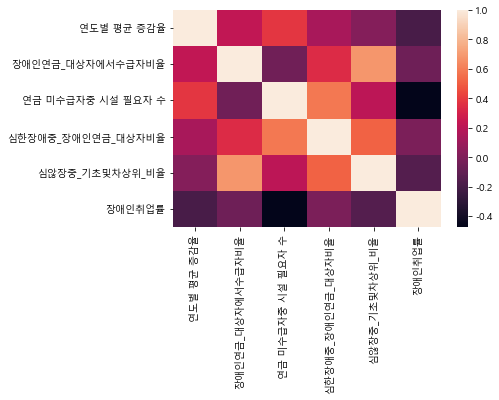

In [95]:
sns.heatmap(dff.corr())

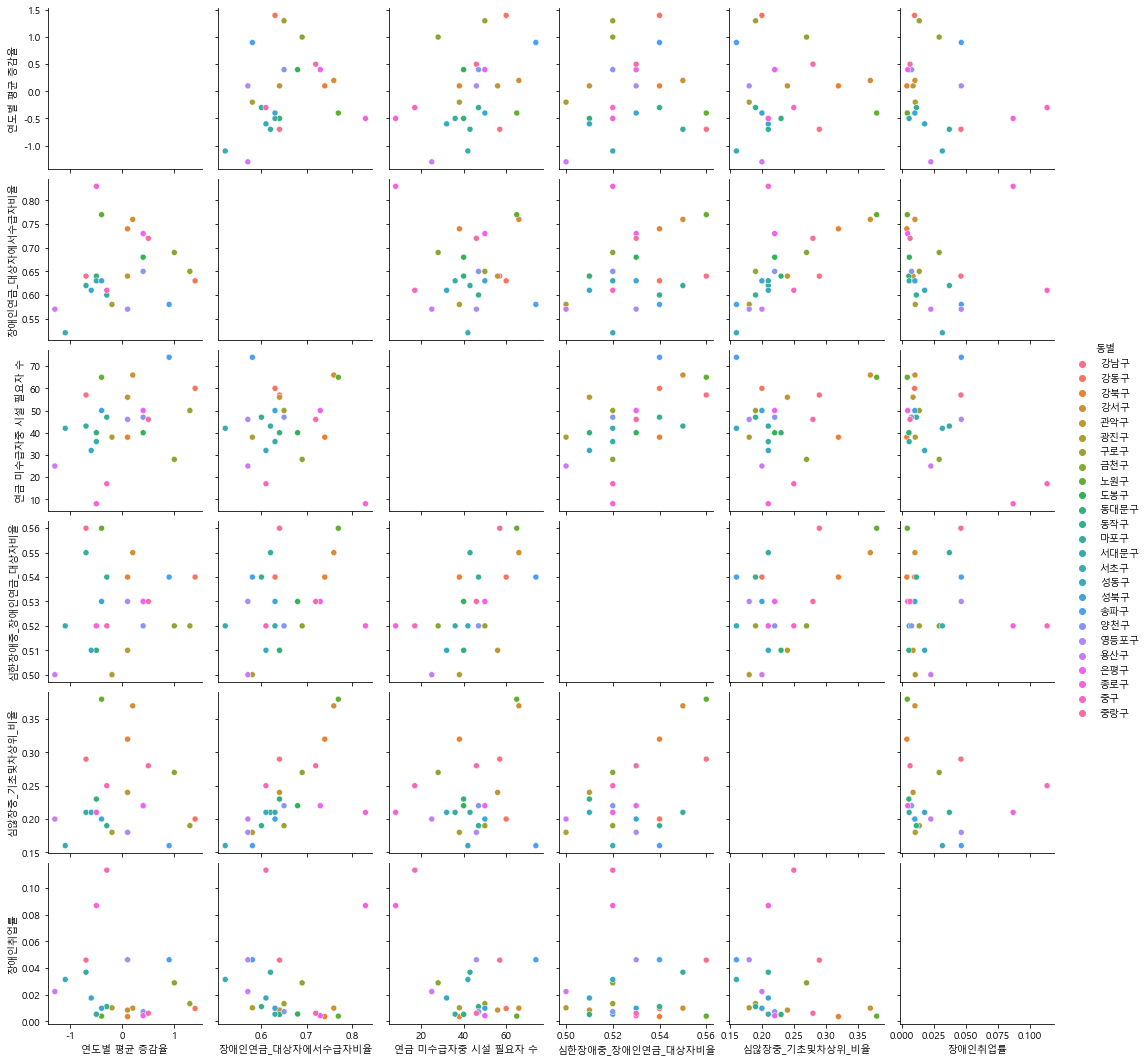

In [97]:
sns.pairplot(dff, hue="동별")
plt.show()

<AxesSubplot:xlabel='심않장중_기초및차상위_비율', ylabel='장애인연금_대상자에서수급자비율'>

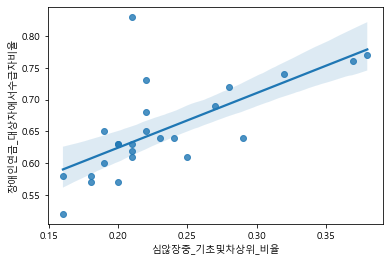

In [98]:
sns.regplot(x='심않장중_기초및차상위_비율', y='장애인연금_대상자에서수급자비율', data=dff, fit_reg=True)

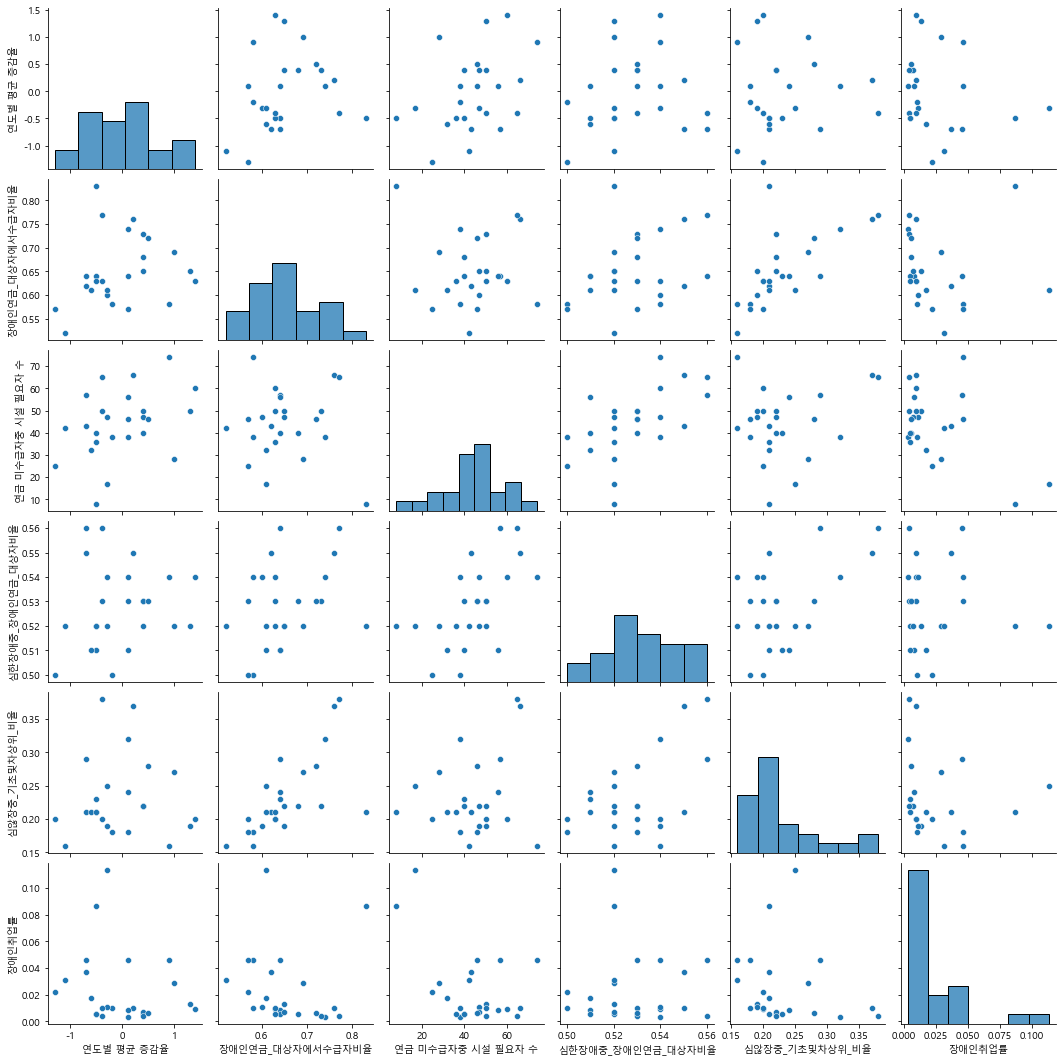

In [99]:
sns.pairplot(dff,palette='gray')

In [90]:
df5 = pd.read_csv('장애인구직자현황.csv', encoding='cp949')
df5

,연번,구직등록일,연령,희망지역,희망직종,희망임금,장애유형,중증여부,기관분류
0,1,2021-10-01,19,경기 하남시,음료 조리사(바리스타 포함),"(월급)1,800,000",지적장애,중증,공단
1,2,2021-10-01,33,서울 금천구,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단
2,3,2021-10-01,19,경남 김해시,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단
3,4,2021-10-01,18,대전 동구,환경 미화원,"(월급)1,800,000",지적장애,중증,공단
4,5,2021-10-01,30,인천 연수구,공공행정 사무원,"(연봉)24,000,000",지체장애,경증,공단
...,...,...,...,...,...,...,...,...,...
35805,35806,2021-04-29,26,서울 종로구,직업 운동선수,"(시급)8,720",지체장애,중증,공단
35806,35807,2021-04-29,54,경기 고양시 일산동구,세탁원(다림질원),"(시급)8,720",지체장애,경증,공단
35807,35808,2021-04-29,66,인천 미추홀구,공예원,"(시급)8,720",지체장애,중증,공단
35808,35809,2021-04-29,20,인천 남동구,공예원,"(시급)8,720",지적장애,중증,공단


In [92]:
df5['희망지역_구별'] = df5.희망지역.str.extract('서울\s([가-힣]+)')
df5

,연번,구직등록일,연령,희망지역,희망직종,희망임금,장애유형,중증여부,기관분류,희망지역_구별
0,1,2021-10-01,19,경기 하남시,음료 조리사(바리스타 포함),"(월급)1,800,000",지적장애,중증,공단,NaN
1,2,2021-10-01,33,서울 금천구,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단,금천구
2,3,2021-10-01,19,경남 김해시,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단,NaN
3,4,2021-10-01,18,대전 동구,환경 미화원,"(월급)1,800,000",지적장애,중증,공단,NaN
4,5,2021-10-01,30,인천 연수구,공공행정 사무원,"(연봉)24,000,000",지체장애,경증,공단,NaN
...,...,...,...,...,...,...,...,...,...,...
35805,35806,2021-04-29,26,서울 종로구,직업 운동선수,"(시급)8,720",지체장애,중증,공단,종로구
35806,35807,2021-04-29,54,경기 고양시 일산동구,세탁원(다림질원),"(시급)8,720",지체장애,경증,공단,NaN
35807,35808,2021-04-29,66,인천 미추홀구,공예원,"(시급)8,720",지체장애,중증,공단,NaN
35808,35809,2021-04-29,20,인천 남동구,공예원,"(시급)8,720",지적장애,중증,공단,NaN


In [93]:
df5.dropna()

,연번,구직등록일,연령,희망지역,희망직종,희망임금,장애유형,중증여부,기관분류,희망지역_구별
1,2,2021-10-01,33,서울 금천구,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단,금천구
5,6,2021-10-01,34,서울 서초구,사무 보조원(공공기관),"(시급)8,720",시각장애,경증,공단,서초구
7,8,2021-10-01,21,서울 송파구,환경·청소 관리자,"(시급)8,720",지적장애,중증,공단,송파구
27,28,2021-09-28,36,서울 금천구,"인쇄, 목재, 가구 및 기타 제조 분야 단순 종사원","(시급)8,720",지적장애,중증,공단,금천구
28,29,2021-09-28,50,서울 중구,가족·학교·아동·청소년·노인·중독 등 상담 전문가,"(시급)8,720",정신장애,중증,공단,중구
...,...,...,...,...,...,...,...,...,...,...
35790,35791,2021-01-14,49,서울 송파구,사무 보조원(공공기관),"(시급)8,720",뇌병변장애,경증,공단,송파구
35792,35793,2021-01-14,63,서울 구로구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)","(시급)8,720",지체장애,경증,공단,구로구
35793,35794,2021-01-14,34,서울 마포구,모니터 요원,"(시급)8,720",지체장애,경증,공단,마포구
35799,35800,2021-04-29,39,서울 양천구,음료 조리사(바리스타 포함),"(시급)8,720",뇌병변장애,중증,공단,양천구


In [52]:
df2['중증여부'].replace(['중증','경증'],[1,0], inplace = True)
df2

,연령,장애유형,중증여부,취업직종대분류,근무지역_구별
171,30,지체장애,1,경영·행정·사무직,송파구
172,23,지적장애,1,경영·행정·사무직,송파구
173,32,정신장애,1,경영·행정·사무직,송파구
179,20,청각장애,1,스포츠·레크리에이션직,강남구
180,36,지체장애,1,스포츠·레크리에이션직,강남구
...,...,...,...,...,...
31617,22,언어장애,0,인쇄·목재·공예 및 기타 설치·정비·생산직,종로구
31618,70,지체장애,0,인쇄·목재·공예 및 기타 설치·정비·생산직,광진구
31621,53,지체장애,0,사회복지·종교직,구로구
31643,53,시각장애,0,영업·판매직,구로구


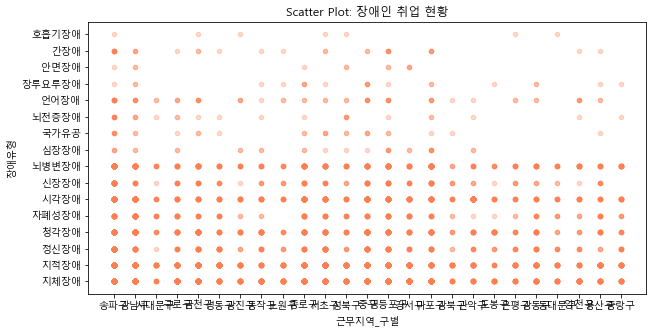

In [57]:
df2.plot(kind='scatter', x='근무지역_구별', y='장애유형', c='coral', figsize=(10, 5),
        alpha=0.3)
plt.title('Scatter Plot: 장애인 취업 현황')
plt.show()

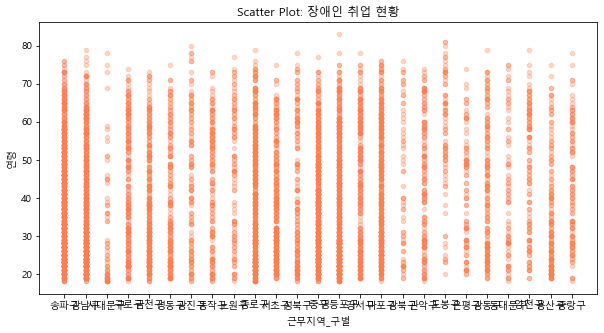

In [59]:
df2.plot(kind='scatter', x='근무지역_구별', y='연령', c='coral', figsize=(10, 5),
        alpha=0.3)
plt.title('Scatter Plot: 장애인 취업 현황')
plt.show()